In [4]:
import sys
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')

from loss import *
from solver import *
from Generator import *

import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sb

/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph/Generator.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_mean = torch.tensor(group_mean[group_label[i],])


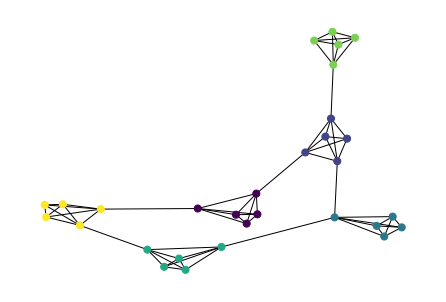

In [5]:
list_shapes = ['nx.complete_graph'] * 6
list_shapes_args = [[5]] * 6
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [6, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=True, plot_color='group_label', savefig=False, root=None, figname=None)
node_features, group_mean = synthetic_feature_generator(group_label, num_features=50, std=0.5, save=False, root=False) 
node_features = node_features.numpy()
group_mean = group_mean.numpy()
group_label = np.array(group_label)
L = np.float32(nx.laplacian_matrix(G).todense())
Gamma = np.float32(nx.incidence_matrix(G).todense().T) # E * N
for i in range(Gamma.shape[0]):
    for j in range(Gamma.shape[1]):
        if Gamma[i,j] !=0:
            Gamma[i,j] = - Gamma[i,j]
            break

/var/folders/v7/6y4d148j17v1f9cfgqn0t_ym0000gn/T/ipykernel_55804/3786730910.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  W = lap_sylvester_solver(X=node_features, L=L, l2=np.float(100))


<AxesSubplot:>

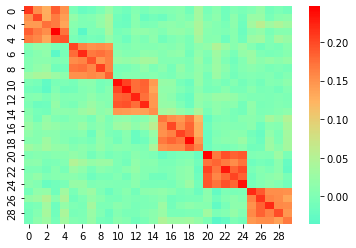

In [6]:
# the optimal W when there is no constraint
W = lap_sylvester_solver(X=node_features, L=L, l2=np.float(100))
sb.heatmap(W, cmap='rainbow', center=0)

#### Dirichlet process

In [26]:
from sklearn import mixture
dpgmm = mixture.BayesianGaussianMixture(n_components = 6, covariance_type="full")
dpgmm.fit(W)
dpgmm.predict(W)

array([5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 4, 4, 4, 4, 4])

#### kplusplus

In [30]:
from cluster import *
selected = kplusplus(W, k=15, random_seed=0)
group_label[selected]

array([2, 3, 5, 4, 0, 1, 3, 0, 5, 4, 2, 3, 1, 0, 4])

In [31]:
res = eval_kplusplus(W=W, X=node_features, selected=selected)

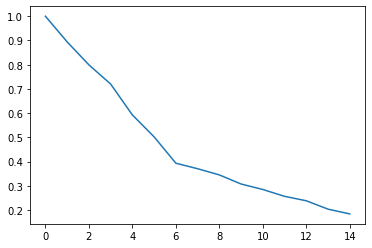

In [32]:
plt.plot(res)